In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
pd.set_option('display.max_columns', None)
df.head()


Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize  \
0                       NaN   
1        20 to 99 employees   
2  10,000 or more employees   
3  10,000 or more employees   
4        10 to 19 employees   

                                         CompanyType      YearsProgram  \
0                                                NaN      2 to 3 years   
1  Privately-held limited company, not in startup...     9 to 10 years   
2                        Publicly-traded corporation  20 or more years   
3  Non-profit/non-governmental organization or pr...    14 to 15 years   
4  Privately-held limited company, not in startup...  20 or more years   

      YearsCodedJob YearsCodedJobPast  \
0               NaN               NaN   
1               NaN               NaN   
2  20 or more years               NaN   
3     9 to 10 years               NaN   
4    10 to 11 years               NaN   

                                       DeveloperType WebDeveloperType  \
0                                                NaN              NaN   
1                                                NaN              NaN   
2                                              Other              NaN   
3                                                NaN              NaN   
4  Mobile developer; Graphics programming; Deskto...              NaN   

  MobileDeveloperType NonDeveloperType  CareerSatisfaction  JobSatisfaction  \
0                 NaN              NaN                 NaN              NaN   
1                 NaN              NaN                 NaN              NaN   
2                 NaN              NaN                 8.0              9.0   
3                 NaN   Data scientist                 6.0              3.0   
4                 NaN              NaN                 6.0              8.0   

  ExCoderReturn ExCoderNotForMe ExCoderBalance ExCoder10Years ExCoderBelonged  \
0           NaN             NaN            NaN            NaN             NaN

In [36]:
schema = pd.read_csv('./survey_results_schema.csv')
pd.set_option("max_colwidth",None)
pd.set_option("max_rows", None)
schema.head()

Column  \
0    Respondent   
1  Professional   
2  ProgramHobby   
3       Country   
4    University   

                                                                                 Question  
0                                                                    Respondent ID number  
1                                              Which of the following best describes you?  
2                        Do you program as a hobby or contribute to open source projects?  
3                                                 In which country do you currently live?  
4  Are you currently enrolled in a formal, degree-granting college or university program?

In [3]:

# Extract only USA data
dfUSA = df.loc[df['Country']=="United States",  ['MajorUndergrad','YearsProgram','EmploymentStatus','Salary']]
# Drop all NA rows
dfUSA = dfUSA.dropna()
dfUSA.head(10)

MajorUndergrad  \
17                       Computer science or software engineering   
18                       Computer science or software engineering   
25                       Computer science or software engineering   
70   Information technology, networking, or system administration   
72                       Computer science or software engineering   
76     Computer engineering or electrical/electronics engineering   
81                       Computer science or software engineering   
83                       Computer science or software engineering   
99                       Computer science or software engineering   
103                                                Something else   

         YearsProgram    EmploymentStatus    Salary  
17   20 or more years  Employed full-time  130000.0  
18       2 to 3 years  Employed full-time   82500.0  
25   20 or more years  Employed full-time  175000.0  
70       2 to 3 years  Employed full-time   65000.0  
72   20 or more years  Employed full-time  120000.0  
76   20 or more years  Employed full-time   96283.0  
81     17 to 18 years  Employed full-time  110000.0  
83   20 or more years  Employed full-time  165000.0  
99   20 or more years  Employed full-time  109400.0  
103      1 to 2 years  Employed full-time   51000.0

In [4]:
# Consider only Full Time employment status

dfUSA_fulltime = dfUSA[dfUSA.EmploymentStatus== "Employed full-time"]

dfUSA_fulltime.head()

MajorUndergrad  \
17                      Computer science or software engineering   
18                      Computer science or software engineering   
25                      Computer science or software engineering   
70  Information technology, networking, or system administration   
72                      Computer science or software engineering   

        YearsProgram    EmploymentStatus    Salary  
17  20 or more years  Employed full-time  130000.0  
18      2 to 3 years  Employed full-time   82500.0  
25  20 or more years  Employed full-time  175000.0  
70      2 to 3 years  Employed full-time   65000.0  
72  20 or more years  Employed full-time  120000.0

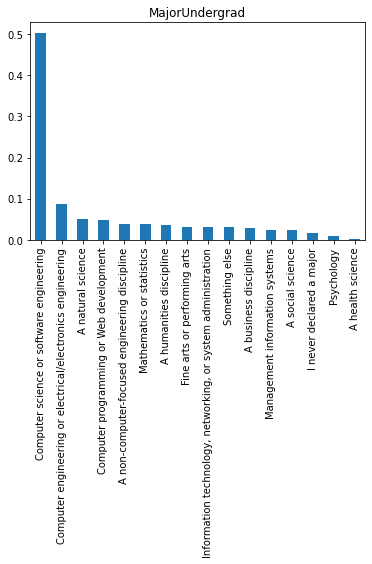

In [5]:
# Count of MajorUndergrad
major_undergrad  = dfUSA_fulltime.MajorUndergrad.value_counts()
# Bar chart proportion of MajorUndergrad
(major_undergrad/dfUSA_fulltime.shape[0]).plot(kind="bar");
plt.title("MajorUndergrad");

In [6]:

# Dropping all the " I dont know ", I prefer not to answer" or "Something else"
exclude = [ "I never declared a major", "Something else"]
major_new= dfUSA_fulltime[~dfUSA_fulltime['MajorUndergrad'].isin(exclude)]
major_new.head()

MajorUndergrad  \
17                      Computer science or software engineering   
18                      Computer science or software engineering   
25                      Computer science or software engineering   
70  Information technology, networking, or system administration   
72                      Computer science or software engineering   

        YearsProgram    EmploymentStatus    Salary  
17  20 or more years  Employed full-time  130000.0  
18      2 to 3 years  Employed full-time   82500.0  
25  20 or more years  Employed full-time  175000.0  
70      2 to 3 years  Employed full-time   65000.0  
72  20 or more years  Employed full-time  120000.0

In [7]:
# Counting
major1 = major_new.MajorUndergrad.value_counts()
major1
#major1/major_new.shape[0].plot(kind = "bar");
#plt.title("MajorUndergrad")

Computer science or software engineering                        1815
Computer engineering or electrical/electronics engineering       312
A natural science                                                181
Computer programming or Web development                          176
A non-computer-focused engineering discipline                    141
Mathematics or statistics                                        138
A humanities discipline                                          132
Fine arts or performing arts                                     115
Information technology, networking, or system administration     112
A business discipline                                            104
Management information systems                                    91
A social science                                                  83
Psychology                                                        33
A health science                                                   7
Name: MajorUndergrad, dtype: int64

In [37]:
non_computer_focused =  ["A health science", "Psychology", "A social science", "Management information systems", "A business discipline", "Fine arts or performing arts","A humanities discipline", "Mathematics or statistics", "A non-computer-focused engineering discipline" , "A natural science" ]
computer_focused = ["Computer science or software engineering","Computer engineering or electrical/electronics engineering","Computer programming or Web development","Information technology, networking, or system administration"  ]

major_new['IsComputerRelated'] = np.where(major_new.loc[:,'MajorUndergrad'].isin (non_computer_focused), True, False)




<ipython-input-37-949ad20fbdf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_new['IsComputerRelated'] = np.where(major_new.loc[:,'MajorUndergrad'].isin (non_computer_focused), True, False)


In [38]:
non_computer_focused =  ["A health science", "Psychology", "A social science", "Management information systems", "A business discipline", "Fine arts or performing arts","A humanities discipline", "Mathematics or statistics", "A non-computer-focused engineering discipline" , "A natural science" ]
computer_focused = ["Computer science or software engineering","Computer engineering or electrical/electronics engineering","Computer programming or Web development","Information technology, networking, or system administration"  ]
def Computer(c):
    if major_new['MajorUndergrad'].isin(computer_focused):
        return True
    if major_new['MajorUndergrad'].isin(non_computer_focused):
        return False
    else:
        return "Undefined"

major_new['Computer'] = major_new.apply(Computer, axis = 0)

major_new.head()







ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().